In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import missingno as msno

# %matplotlib inline
# %matplotlib notebook

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import SCORERS

from scipy.stats import randint

## Prepare data for machine learning

In [4]:
temp = pd.read_csv('temp_year_int.csv')
X = temp.drop('MSRP', axis=1)
y = temp['MSRP']

In [67]:
X['Year'].dtypes

dtype('float64')

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30239 entries, 0 to 30238
Columns: 1436 entries, Year to Engine_Type_Twin-Turbocharged Gas V8
dtypes: float64(32), int64(1404)
memory usage: 331.3 MB


Since the data was aggregated by the car model and year in the dataset, it is necessary to shuffle the data. Otherwise, the train set and test test might be inclined to certain car models. The drawback is not seeing the variety during the learning and prediction score is biased.  Therefore, train_test_split is used here for the single purpose of shuffling the dataset. That is why the test_size is set very small, it is not really going to used for evaluation. The evaluation is done inside cross_val_score function using 20% of X_train and y_train, i.e., cv=5.

In [7]:
# hold scores for different models
scores = {}

### Linear Regression

In [8]:
%%time
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Create the regressor: reg_all
lr = LinearRegression()

cross_val_scores= cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')


scores['Linear regression'] = np.mean(cross_val_scores)

print('Linear Regression Cross-Validation Scores:')
for score in cross_val_scores:
    print(score)
print('Average Score:', scores['Linear regression'])



Linear Regression Cross-Validation Scores:
0.9651264395918613
0.9689271404169615
0.9543460541230163
0.9655432039912849
0.950560995333501
Average Score: 0.960900766691325
Wall time: 13 s


## Ridge Regression

In [9]:
%%time
# shuffle the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

ridge = Ridge(random_state=42)

cross_val_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores["Ridge Regression"] = np.mean(cross_val_scores)

print("Ridge Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Ridge Regression"])#

Ridge Regression Cross-Validation Scores:
0.9597048330706274
0.9620711994509747
0.9579237500223583
0.9593171717402567
0.9502609137308421
Average Score: 0.9578555736030119
Wall time: 5.92 s


## Lasso Regression

In [10]:
%%time
from sklearn.linear_model import Lasso

# shuffle the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

lasso = Lasso(random_state=42)

cross_val_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
scores["Lasso Regression"] = np.mean(cross_val_scores)

print("Lasso Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score on 5-Folds:', scores["Lasso Regression"])


Lasso Regression Cross-Validation Scores:
0.9635947832732212
0.9669472026442455
0.9526140071140484
0.9631316370007833
0.9627409043666872
Average Score on 5-Folds: 0.9618057068797972
Wall time: 2min 29s


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeRegressor

# shuffle dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

trees = DecisionTreeRegressor(max_depth=6, random_state=42)

cross_val_scores = cross_val_score(trees, X_train, y_train, cv=5, scoring='r2')

scores["Decision Tree"] = np.mean(cross_val_scores)

print("Decision Tree Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Decision Tree"])

Decision Tree Cross-Validation Scores:
0.9114917977207571
0.9170535531515565
0.8859674424940345
0.8915948281017029
0.9202248693243329
Average Score: 0.9052664981584767


# Random Forest

In [12]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

rf.fit(X_train, y_train)

predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
scores["Random Forest"] = test_score
print('Test score:', test_score)

Test score: 0.9853800204067557
Wall time: 2min 29s


In [13]:
scores = sorted(scores.items(), key=lambda score: score[1], reverse=True)

for i in range(len(scores)):
    print(scores[i][0], scores[i][1])

Random Forest 0.9853800204067557
Lasso Regression 0.9618057068797972
Linear regression 0.960900766691325
Ridge Regression 0.9578555736030119
Decision Tree 0.9052664981584767


Random Forest shows the best performance.

In [14]:
scores_r2 = scores

## Evaluate Algorithms Using Mean Absolute Error Metric

In [15]:
# hold scores for different models
scores = {}

### Linear Regression

In [16]:
%%time
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Create the regressor: reg_all
lr = LinearRegression()

cross_val_scores= cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')


scores['Linear regression'] = np.mean(cross_val_scores)

print('Linear Regression Cross-Validation Scores:')
for score in cross_val_scores:
    print(score)
print('Average Score:', scores['Linear regression'])

# lr.fit(X_test, y_test)
# predicted_test = lr.predict(X_test)
# test_score = r2_score(y_test, predicted_test)
# final_scores["Lasso"] = test_score
# print('Final score:', test_score)

Linear Regression Cross-Validation Scores:
-3221.6572359044876
-3201.474044902402
-3212.902574549008
-3094.184599577493
-3272.4911129754396
Average Score: -3200.541913581766
Wall time: 14.4 s


In [17]:
# sorted(SCORERS.keys())

## Ridge Regression

In [18]:
%%time
# shuffle the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

ridge = Ridge(random_state=42)

cross_val_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores["Ridge Regression"] = np.mean(cross_val_scores)

print("Ridge Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Ridge Regression"])#

Ridge Regression Cross-Validation Scores:
-3701.647547820652
-3754.496475824158
-3614.898467980299
-3624.826216781078
-3661.5743867545975
Average Score: -3671.488619032157
Wall time: 5.39 s


## Lasso Regression

In [19]:
%%time
from sklearn.linear_model import Lasso

# shuffle the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

lasso = Lasso(random_state=42)

cross_val_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores["Lasso Regression"] = np.mean(cross_val_scores)

print("Lasso Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score on 5-Folds:', scores["Lasso Regression"])

Lasso Regression Cross-Validation Scores:
-3388.4883170743365
-3422.889017733182
-3432.0473623612284
-3345.8563602594527
-3402.380627602356
Average Score on 5-Folds: -3398.3323370061107
Wall time: 2min 6s


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

# shuffle dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

trees = DecisionTreeRegressor(max_depth=6, random_state=42)

cross_val_scores = cross_val_score(trees, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

scores["Decision Tree"] = np.mean(cross_val_scores)

print("Decision Tree Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Decision Tree"])

Decision Tree Cross-Validation Scores:
-5721.905927363076
-5772.605596626145
-6090.354674955384
-5891.8759665484695
-5626.5098476788435
Average Score: -5820.650402634384


# Random Forest

In [21]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

rf.fit(X_train, y_train)

predicted_test = rf.predict(X_test)
test_score = -1 * mean_absolute_error(y_test, predicted_test)
scores["Random Forest"] = test_score
print('Test score:', test_score)

Test score: -1691.4190882494902
Wall time: 2min 23s


In [22]:
print('Test score:', test_score)

Test score: -1691.4190882494902


In [23]:
scores = sorted(scores.items(), key=lambda score: score[1], reverse=True)

for i in range(len(scores)):
    print(scores[i][0], scores[i][1])

Random Forest -1691.4190882494902
Linear regression -3200.541913581766
Lasso Regression -3398.3323370061107
Ridge Regression -3671.488619032157
Decision Tree -5820.650402634384


In [24]:
scores_mae = scores # mean_absolute_error

In [36]:
scores_r2

[('Random Forest', 0.9853800204067557),
 ('Lasso Regression', 0.9618057068797972),
 ('Linear regression', 0.960900766691325),
 ('Ridge Regression', 0.9578555736030119),
 ('Decision Tree', 0.9052664981584767)]

In [25]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index', columns=['A', 'B', 'C', 'D'])

,A,B,C,D
row_1,3,2,1,0
row_2,a,b,c,d


In [26]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd'], 'idx': ['a','b','c','d']}
pd.DataFrame.from_dict(data).set_index('idx')

,row_1,row_2
idx,,
a,3,a
b,2,b
c,1,c
d,0,d


In [30]:
scores_mae

[('Random Forest', -1691.4190882494902),
 ('Linear regression', -3200.541913581766),
 ('Lasso Regression', -3398.3323370061107),
 ('Ridge Regression', -3671.488619032157),
 ('Decision Tree', -5820.650402634384)]

In [32]:
pd.DataFrame.from_dict(scores_mae)

,0,1
0,Random Forest,-1691.419088
1,Linear regression,-3200.541914
2,Lasso Regression,-3398.332337
3,Ridge Regression,-3671.488619
4,Decision Tree,-5820.650403


In [ ]:
pd.DataFrame.from_dict(scores_mae, orient='index', columns=['mae'])

### Summary of Scores

In [41]:
r2_df = pd.DataFrame(scores_r2)
r2_df.columns = ['Models', 'r2']
r2_df

,Models,r2
0,Random Forest,0.985380
1,Lasso Regression,0.961806
2,Linear regression,0.960901
3,Ridge Regression,0.957856
4,Decision Tree,0.905266


In [43]:
mae_df = pd.DataFrame(scores_mae)
mae_df.columns = ['Models', 'negative mean absolute error']
mae_df

,Models,negative mean absolute error
0,Random Forest,-1691.419088
1,Linear regression,-3200.541914
2,Lasso Regression,-3398.332337
3,Ridge Regression,-3671.488619
4,Decision Tree,-5820.650403


In [64]:
score_summary = r2_df.merge(mae_df, how='left', on='Models')
score_summary['r2'] = score_summary['r2'].apply(lambda x: np.round(x, 3))
score_summary['negative mean absolute error'] = score_summary['negative mean absolute error'].apply(lambda x: int(x))
score_summary

,Models,r2,negative mean absolute error
0,Random Forest,0.985,-1691
1,Lasso Regression,0.962,-3398
2,Linear regression,0.961,-3200
3,Ridge Regression,0.958,-3671
4,Decision Tree,0.905,-5820


In [65]:
score_summary.to_csv('score_summary.csv', index=False)

Most of the models used give excellent goodness of fit that their r2 scores are mostly above 0.96. This indicate these models are of good choice.
Random Forest gives the best performance with r2 being very close to 0.99. Decision Tree has the poorest performance with a r2_score of 0.908.
The reason that Random Forest is about 0.02 higher in r2_score than linear approach is because there are a lot of categorical features in the dataset that are more meaningful in decision making instead of numeric significance.
The mean absolute error from sklearn.metrics was also used to examine model performance. The scores are listed in the table above. It can be seen Decision Trees still tops the perforce. Scoring for Linear Regression is, however, exceedingly low. This tell us selection of metrics has a great influence on ranking the performance of algorithms.
Feature Importance
The feature importance results are shown in the table below. The bar graph shows top 20 features. 


The HP2 (torque spec) has the highest importance, which is at least 4 times higher than the rest. The 2nd highest is Displacement, which is at least 2 times higher than the rest. These top 2 features are all specs related to car engines. The engine is the heart of a car that is the most dominating part for the major performance of car for example the car’s lifetime, speed, driving smoothness, horsepower, fuel efficiency, etc. So, their influence on car price should be greater than other features.

Basic_Miles and Driverain_Years are in the warranty category and are surprisingly in the top ranking. The domain knowledge is required to explain it.

Size_avg, Volume, Width, Length, and Height are specs for car’s dimensions. Their feature importance is somewhat close to each other and ranges from 0.011 to 0.016. This again proves the Decision Tree is an intelligent ensemble learning method.

HP1 is the horse power. Its feature importance is 0.01 that is 52 times lower than that of torque spec (HP2). Careful examination of two series of the data reveal HP1/HP2 ratio has a wide range from 0.5 to 10.8, in stead of being a constant. This is probably because the car manufacturers are not adopting the same engine speed to obtain horsepower and torque specs. The following figure helps to understand that the horsepower follows a nearly linear relationship with engine speed, however, the torque doesn’t. 

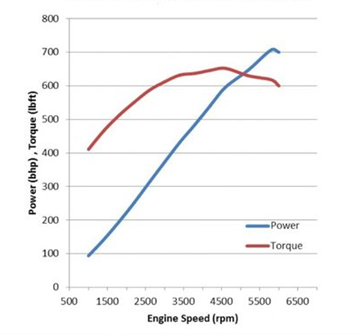
courtesy: https://www.caranddriver.com/news/a15347872/horsepower-vs-torque-whats-the-difference/

Weight ranks 14th. Miles per gallon MPG_City ranks 16th. It is common knowledge that a heavier car consumes proportionally higher amount of gasoline per mile. This model precisely reveals the close relationship between the two specs. 

Some car models like Model_Lamborghini Aventador, Model_Maserati Quattroporte, and Model_Bentley Continental GT are in top 50 important features and are more important than technical specs. For example, the feature importance of Model_Lamborghini Aventador is greater than that of number of passenger doors. This is probably because these are luxury cars that have a lot of weight on price tag.


In [49]:
# HP1 and HP2 has very different feature importance.
horse_ratio = X['HP1'] / X['HP2']


In [50]:
print(min(horse_ratio.unique()), max(horse_ratio.unique()))

0.4669811320754717 10.806451612903226


## Feature Importance

In [51]:
fi = rf.feature_importances_
importance = pd.DataFrame(fi, index=X.columns, columns=['importance'])
importance = importance.reset_index()
importance = importance.rename(columns={'index': 'feature'})
importance_20 = importance.sort_values(['importance'], ascending=False).head(20)

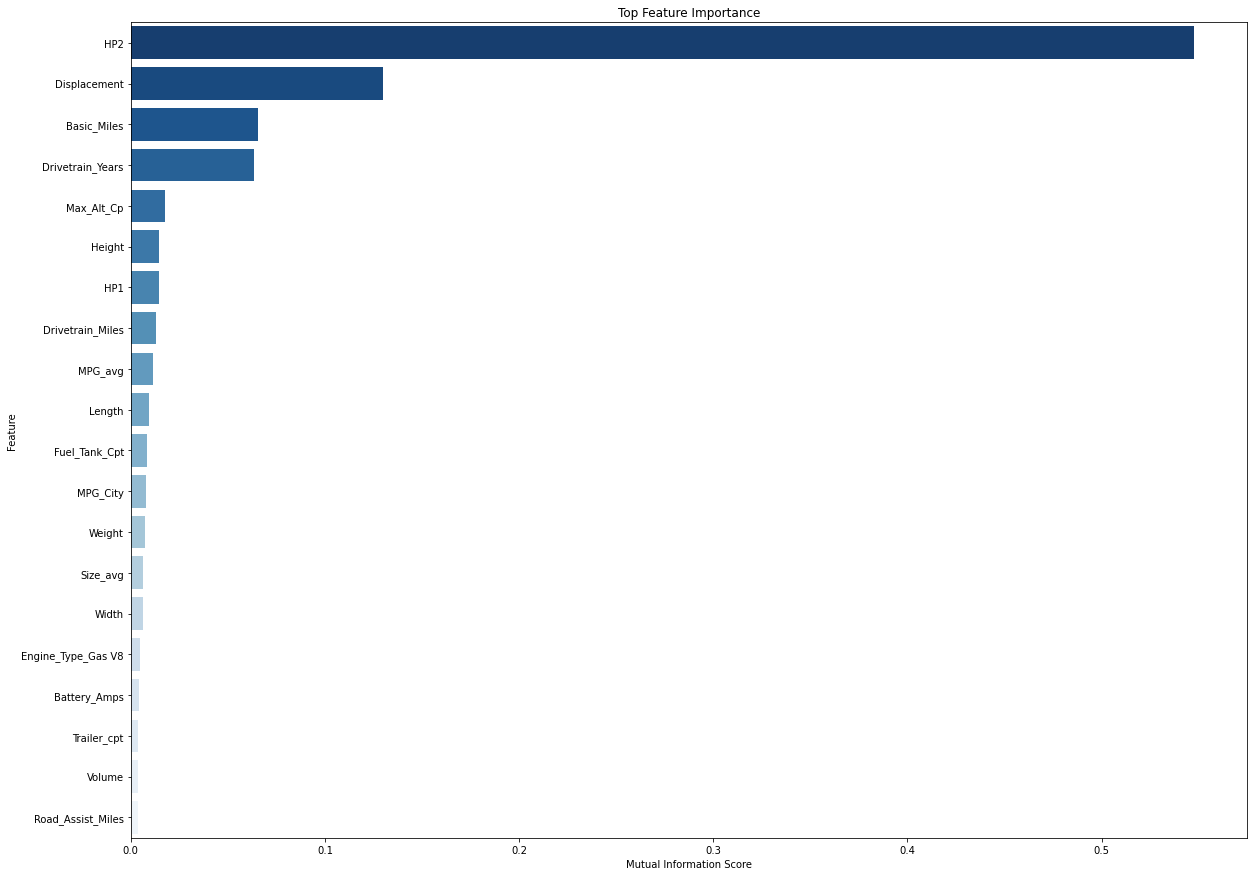

In [52]:
# top_features = np.array(feature_scores[:20])

f, axes = plt.subplots(figsize=(20,15))
ax = sns.barplot(x=importance_20['importance'],
                 y=importance_20['feature'],
                 palette = "Blues_r")
ax.set(title="Top Feature Importance", xlabel="Mutual Information Score", \
       ylabel="Feature")
plt.show()

Horsepower, displacement, drivetrain years and basic miles are the most important features.

In [53]:
importance.sort_values('importance', ascending=False)[:80]

,feature,importance
28,HP2,0.547464
29,Displacement,0.129641
3,Basic_Miles,0.065283
6,Drivetrain_Years,0.063193
9,Max_Alt_Cp,0.017410
...,...,...
968,Susp_Rear_Double Wishbone Pushrod,0.000163
585,Body_Stype_Sport Utility,0.000161
640,Airbag_SHR_Yes,0.000161
1153,Susp_Rear2_Double Wishbone Pushrod,0.000159


In [54]:
imp = importance.sort_values('importance', ascending=False).reset_index(drop=True)

print(imp.iloc[:50, :])

                                         feature  importance
0                                            HP2    0.547464
1                                   Displacement    0.129641
2                                    Basic_Miles    0.065283
3                               Drivetrain_Years    0.063193
4                                     Max_Alt_Cp    0.017410
5                                         Height    0.014532
6                                            HP1    0.014451
7                               Drivetrain_Miles    0.012801
8                                        MPG_avg    0.011555
9                                         Length    0.009513
10                                 Fuel_Tank_Cpt    0.008129
11                                      MPG_City    0.007610
12                                        Weight    0.007247
13                                      Size_avg    0.006474
14                                         Width    0.006137
15                      

It was found that linear regression sometimes gave vary large negative scores. Using cross validation method, below is an example that shows the predication is very far from the test set.

This problem is most likely caused by the random split that certain cars that are in the test set but not in the train set. In order to solve this problem, Year was used as an integer. Set aside all the cars of one single year as test set, all the rest years’ cars are used an train set. Shown below are the results from picking 5 years. R2 scores are also recorded. Therefore, by using choosing test set based on year, the problem with imbalanced dataset can be solved.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


K = 5
splits = KFold(K)
all_splits = []
models = []
train_preds = []
test_preds = []
for split in splits.split(X_train):
    all_splits = all_splits + [split] # stores the split indices for each split in a list
    fold_train = split[0]
    fold_test = split[1]
    lr = LinearRegression()
    models = models + [lr.fit(X_train.iloc[fold_train, :], y[fold_train])] # stores the individual models in a list
    train_preds = train_preds + [lr.predict(X_train.iloc[fold_train, :])] # stores the train predictions for each split in a list
    test_preds = test_preds + [lr.predict(X_train.iloc[fold_test])] # stores the test predictions for each split in a list

fig, ax = plt.subplots()
for i in range(len(test_preds)):    
    ax.scatter(y_train.iloc[all_splits[i][1]], test_preds[i], label = 'fold ' + str(i))
ax.legend()
plt.show()

## Improvement of Linear Regression Using Year as Integer
Year as Integer: Its Influence on Model Performance
Since the car prices usually rise each year, it is reasonable to use this variable as integer. 


In [60]:
years = sorted(X['Year'].unique())[::7]
years

[1991.0, 1998.0, 2005.0, 2012.0]

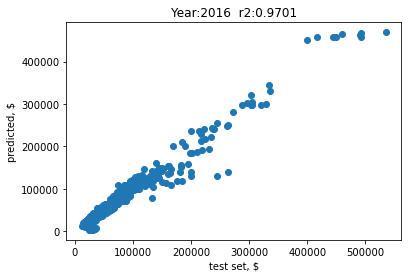

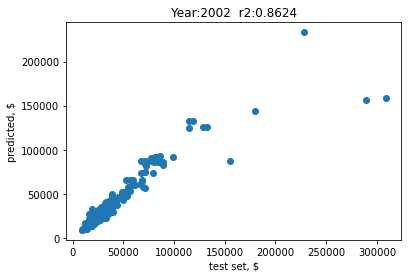

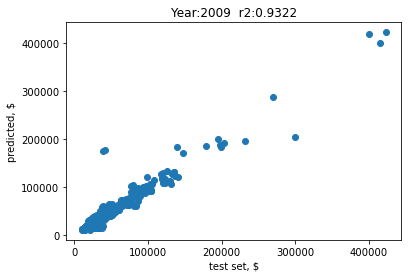

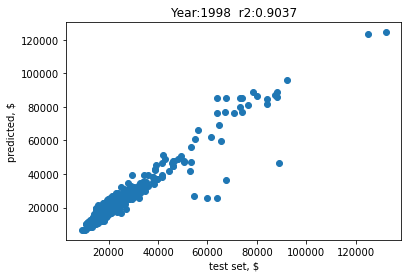

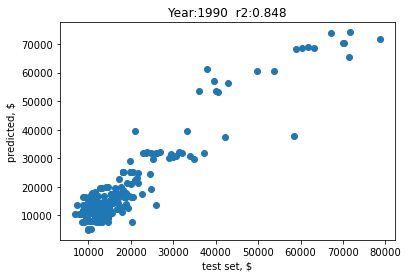

In [58]:
for year in years:
    
    # prepare for tweaking train_test_split
    train = temp[temp['Year']!=year]
    X = train.drop('MSRP', axis=1)
    y = train['MSRP']

    ## Prepare data for machine learning
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1e-5, random_state=42)

    # discard X_test and y_test from train_test_split and use
    test = temp[temp['Year']==year]
    X_test = test.drop('MSRP', axis=1)
    y_test = test['MSRP']

    # Create the regressor: reg_all
    lr = LinearRegression()

    lr.fit(X_train, y_train)

    predicted_test = lr.predict(X_test)
    test_score = r2_score(y_test, predicted_test)

    xy = y_test + predicted_test
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, predicted_test)
    title = 'Year:' + str(int(year)) +'  r2:'+ str(np.round(test_score, 4))
    plt.title(title)
    ax.set_xlabel('test set, $')
    ax.set_ylabel('predicted, $')
    figfile = 'Year'+ str(int(year))
    plt.savefig(figfile)
    plt.show()

However, models performance remains somewhat similar to using year as category. Random Forest ranks 1st position that scores much higher than other models. Random Forest actually performs better when using year as categorical data type. 